# Аналитика данных с помощью pandas и matplotlib

На этом семинаре мы познакомимся с двумя must have инструментами аналитка пишущего на питоне - это библиотеки pandas и matplotlib. Первая предназначена для работы с данными, вторая для визуализации. Эти библиотеки настолько обширны, что на полное их изучение не хватит и семестрового курса. Впрочем, это мало кому нужно.

Для тех кто хочет тесного знакомства:
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Введение

Говорить об аналитике данных "вообще" очень сложно. У каждой задачи своя специфика, интуиция вырабатывается только после долгой работы со многими датасетами из разных областей знания. В аналитике данных самое главное условие успеха --- это знание предметной области. После него идет опыт, интуиция, знание инструментов.


Чтобы было весело мы займемся анализом датасета по криптовалютам. И немного поразмышляем на тему "A что было бы если бы в 2013 году я купил ..."

## 2. Данные

Начнем с необходимых приготовлений.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
import mplfinance.original_flavor  # Библиотека для рисования финансовых графиков

%matplotlib inline

In [2]:
# Для рисования дат в pandas
pd.plotting.register_matplotlib_converters()

In [3]:
# В случае если у вас не работают импорты
# pip3 install ipywidgets
# pip3 install mplfinance

Скачаем наш заранее подготовленный датасет. В реальной жизни вы должны добыть и вычистить его самостоятельно.

In [4]:
coins = pd.read_csv('coins.csv')

Для удобства дальнейшей работы мы сделаем колонку даты индексом

In [5]:
coins['datetime'] = pd.to_datetime(coins['date'])
coins.set_index('datetime', inplace=True)

Посмотрим что получилось

In [6]:
coins

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
2013-04-28,2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2013-04-29,2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
2013-04-29,2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
2013-04-30,2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06,2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
2018-06-06,2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
2018-06-06,2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

## 2. Визуализация

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

### Классический график цены

Нарисуем график цены Veritaseum (VERI) так как обычно его представляют в торговых терминалах, то есть со свечками и усиками. Здесь нам очень пригодится функция `matplotlib.finance.candlestick_ohlc`. Чтобы не засорять глобальное пространство имен, для каждой визуализации я буду делать отдельную функцию. Это еще полезно и тем, что при анализе я могу легко менять параметры. Еще лучше было бы разделать процесс на несколько функций (подготовка данных, подготовка рисунка, отрисовка), но это еще больше усложнило бы наши примеры.

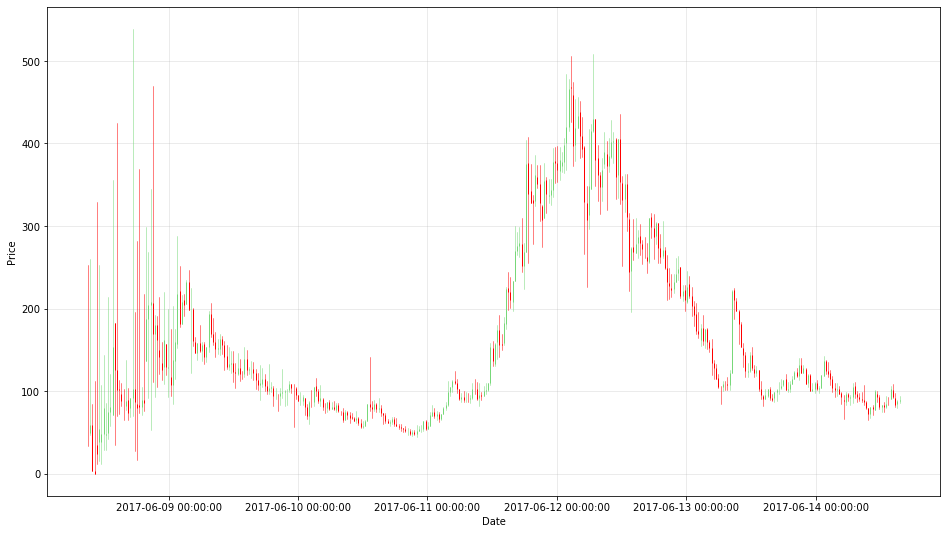

In [7]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    # для каждой даты собираем цену открытия и закрытия, максимальную и манимальную цену во время торгов
    ohlc = [
        (index.timestamp(), row['open'], row['high'], row['low'], row['close'])
        for index, row in coin.iterrows()
    ]

    fig = plt.figure(figsize=(16,9))  # Создаем рисунок
    ax = fig.add_subplot(111)  # Делаем на нем 1 область рисования

    mplfinance.original_flavor.candlestick_ohlc(ax, ohlc, colorup='#77d879', width=1)  # Применяем волшебную функцию
    ax.grid(True, alpha=0.3)  # Делаем координатную сетку
    ax.set_xticklabels(coin.index)  # Подписываем датами деления на оси х
    ax.set_xlabel('Date')  # Подписываем ось х
    ax.set_ylabel('Price')  # Подписываем ось у
    plt.show()  # Отрисовываем

plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

### Технический анализ

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

Нарисуйем график цены и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N=21, K=2.

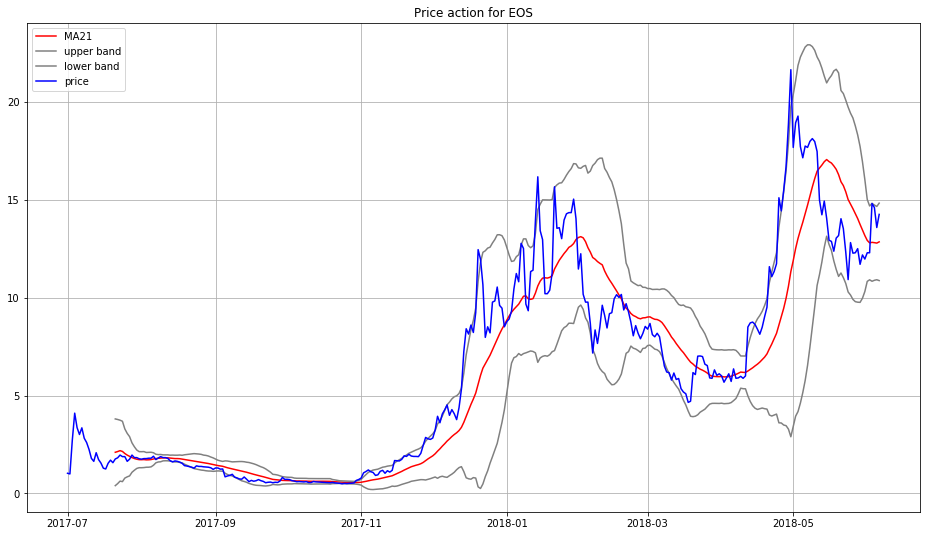

In [8]:
def plot_bollinger_bands(coins, symbol, window, width):
    coin = coins[coins['symbol'] == symbol]  # Отбираем записи относящиеся к нашей монете
    price = coin['price']
    mean = price.rolling(window=window).mean()  # Находим скользящее среднее
    std = price.rolling(window=window).std()  # И скользящее стандартное отклонение
    # А теперь и границы Боллинджера
    upper_band = mean + width * std
    lower_band = mean - width * std 

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))  # Задаем заголовок для грайика
    # Рисуем все что мы насчитали ранее (прим. параметр label это подпись для графика на легенде)
    ax.plot(mean, color='red', label='MA{}'.format(window))  
    ax.plot(upper_band, color='grey', label='upper band')
    ax.plot(lower_band, color='grey', label='lower band')
    ax.plot(price, color='blue', label='price')
    # Не забываем отрисовать легенду и выбираем для нее лучшее расположение
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)

Здесь видно что правило это правило иногда выполняется. Причина в том что на одном анализе графиков далеко не уедешь - надо знать что происходит в твоей предметной области. Например, бешеный рост после марта 2018 года был потому, что команда EOS анонсировала запуск основной сети. 

### Капитализация как индикатор

Нарисуем еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. Будем использовать данные не старше 2017-07-01.

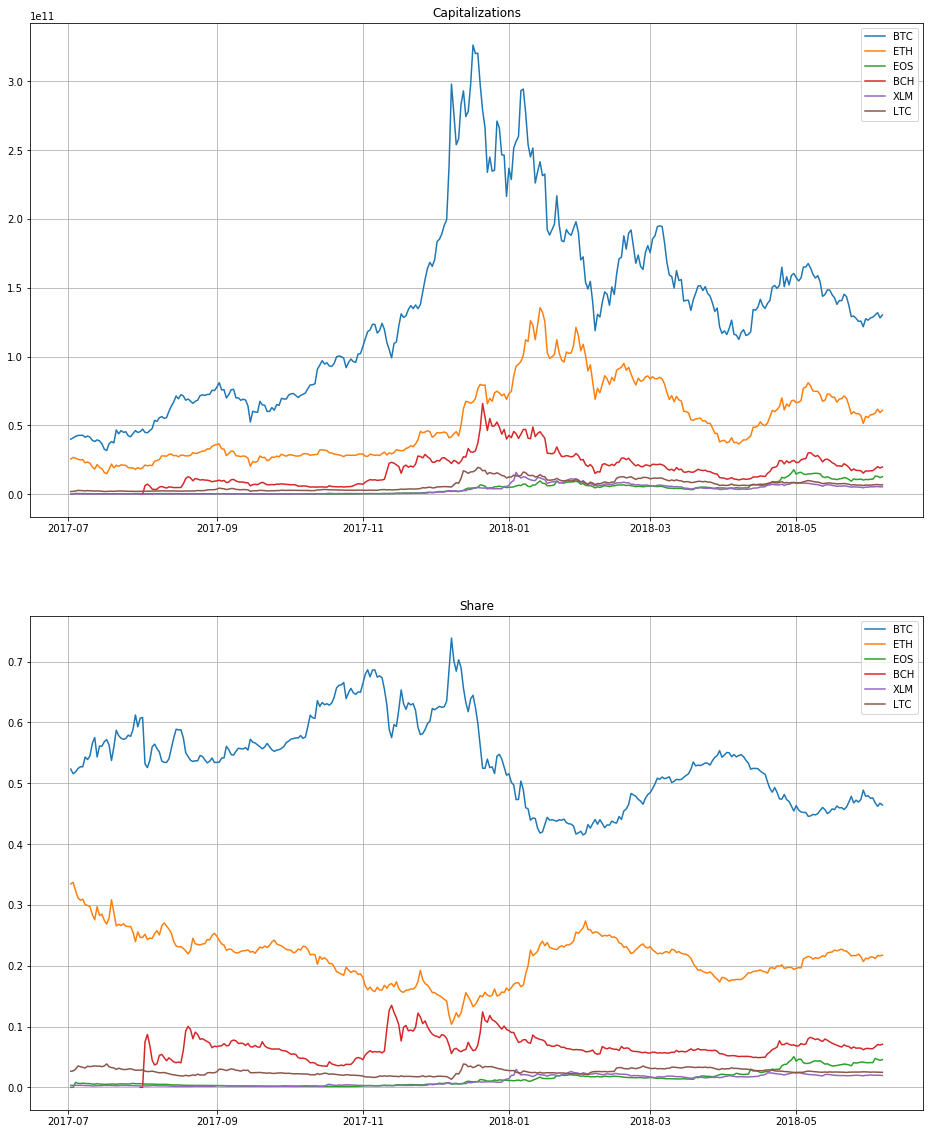

In [9]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Выбираем только свежие данные
    fresh_coins = coins[coins['date'] > start_date]
    # Для каждой даты находим суммарную капитализацию рынка
    total = fresh_coins.groupby(fresh_coins.index).agg({'market':'sum'})
    # Для каждой монеты находим ее капитализация (по дням)
    capitalizations = {
        symbol: fresh_coins.loc[fresh_coins['symbol'] == symbol, 'market']
        for symbol in symbols
    }

    # Создаем рисунок
    # Мы разобъем его на ячейки таблицы из двух строк и одного столбца
    fig = plt.figure(figsize=(16, 20))
    
    # Создаем первую область рисования
    # Первые две цифры говорят о размерах таблицы. 
    # Последняя номер ячейки в этой таблице
    ax1 = fig.add_subplot(211)
    ax1.set_title('Capitalizations')  # Подписываем ее
    # Рисуем график капитализации для каждой монеты
    for symbol in capitalizations:
        ax1.plot(capitalizations[symbol], label=symbol)
    ax1.legend(loc='best')
    ax1.grid(True)

    # Создаем вторую область рисования
    ax2 = fig.add_subplot(212)
    ax2.set_title('Share')
    # Рисуем график доли капитализации для каждой монеты
    for symbol in capitalizations:
        ax2.plot(capitalizations[symbol] / total['market'], label=symbol)
    ax2.legend(loc='best')
    ax2.grid(True)

    plt.show()

plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

По первому графику видно, что рост альткойнов в начале 2018 был сразу после взлета биткойна. Причина в том что игроки придя на рынок в начале года увидели биткойн перекупленным и стали искать дешевые альтернативы - альткойны. Деньги стали переливаться туда. Затем ВНЕЗАПНО пузырь криптовалют стал сдуваться. Но даже на этом падающем тренде можно видеть обратную корреляцию между биткойном и альткойнами. Для этого достаточно посмотреть на доли монет в общей капитализации. Когда доля биткойна растет альткойны идут вниз.

### Корреляции монет

Из прошлого анализа видно что монеты во многом ведут себя одинаково. Посмотрим внимательнее на это явление. Нарисуем матрицу коррелцяций.

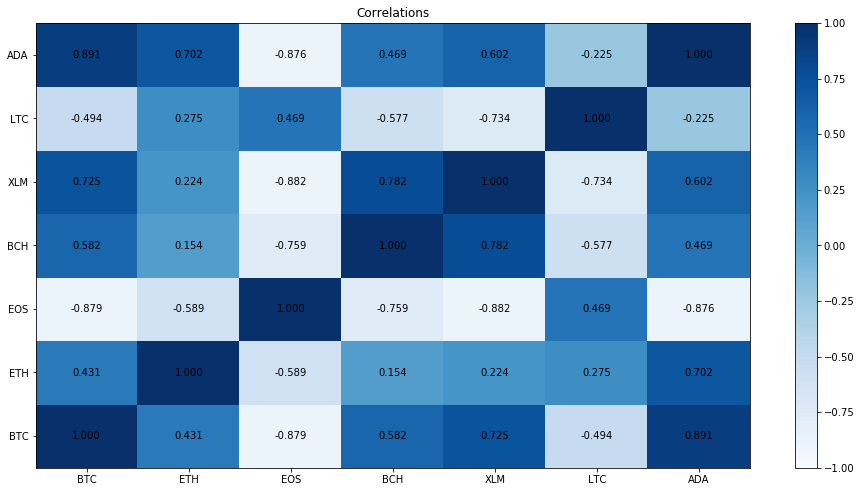

<function __main__.plot_coins_correlations(coins, date, symbols, window, alpha)>

In [10]:
def plot_coins_correlations(coins, date, symbols, window, alpha):
    coins_of_interest = coins[coins['symbol'].isin(symbols)]
    capitalizations = coins_of_interest.pivot(
        index='date', columns='symbol', values='market')
    total = coins_of_interest.pivot_table(index='date', values='market', aggfunc='sum')
    fraction = capitalizations.apply(lambda coin_capitalization: coin_capitalization / total['market'])
    fraction.index = pd.to_datetime(fraction.index)

    # Корреляцию мы будем находить не в конкретный день, а усредненную
    # begin: end - период усреднения
    end = pd.Timestamp(date)
    begin = pd.Timestamp(date) - pd.Timedelta(days=window)
    price_action = fraction[begin:end]
    
    # Скользящее среднее их капитализаций
    correlations = price_action.ewm(alpha=alpha).corr().loc[end]

    # Как обычно готовим рисунок и область рисования
    fig = plt.figure(figsize=(16, 18))
    ax = fig.add_subplot(211)
    ax.set_title('Correlations')
    # Позиции для подписей на осях тепловой карты
    positions = np.arange(len(symbols)) + 0.5
    # Тепловая карта с кастомной цветовой темой
    heat_map = ax.pcolor(correlations, cmap=plt.get_cmap('Blues'), vmin=-1, vmax=1)
    # Для каждой ячейки на тепловой карте
    for pos_x, name_x in zip(positions, correlations.columns):
        for pos_y, name_y in zip(positions, correlations.columns):
            # Поставим в середине ячейки величину посчитанной корреляции
            ax.text(
                pos_x, pos_y, 
                '{:.3f}'.format(correlations.loc[name_x, name_y]), 
                horizontalalignment='center', 
                verticalalignment='center'
            )
    # Добавим рядом шкалу. Шоб было!
    fig.colorbar(heat_map, ax=ax)
    # Поставим засечки на оси х
    ax.set_xticks(positions)
    # Поставим подписи с названиями монет на этих засечках
    ax.set_xticklabels(symbols)
    # Аналогично для оси у
    ax.set_yticks(positions)
    ax.set_yticklabels(symbols)
    
    plt.show()

# Слайдер в графическом интерфейсе по которму можно будет выбирать дату
dates_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2017-01-01', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-04-20'),
    layout={'width': '700px'},
    continuous_update=False)
# Слайдер в графическом интерфейсе по которму можно будет менять окно усреднения
window_slider = ipywidgets.IntSlider(
    value=21,
    min=1, 
    max=50, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)
# Слайдер в графическом интерфейсе по которму можно будет менять параметр сглаживания в усреднении
alpha_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.9, 
    step=0.1, 
    value=0.1,
    layout={'width': '700px'},
    continuous_update=False)

# Создать виджет с термя слайдерами. Брать параметры из этих слайдеров 
# и с ними запускать функцию plot_coins_correlations 
ipywidgets.interact(
    plot_coins_correlations,
    coins=ipywidgets.fixed(coins),
    date=dates_slider, 
    window=window_slider,
    alpha=alpha_slider,
    symbols=ipywidgets.fixed(('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA')),
)

Подобные виджеты удобны тем что вы мгновенно можете менять параметры графиков которые хотите построить. И виджеты это еще одна причина почему построение сложных графиков надо выносить в отдельные функции.

## 3. Анализ одной стратегии

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие стреднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Когда мы покупаем когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

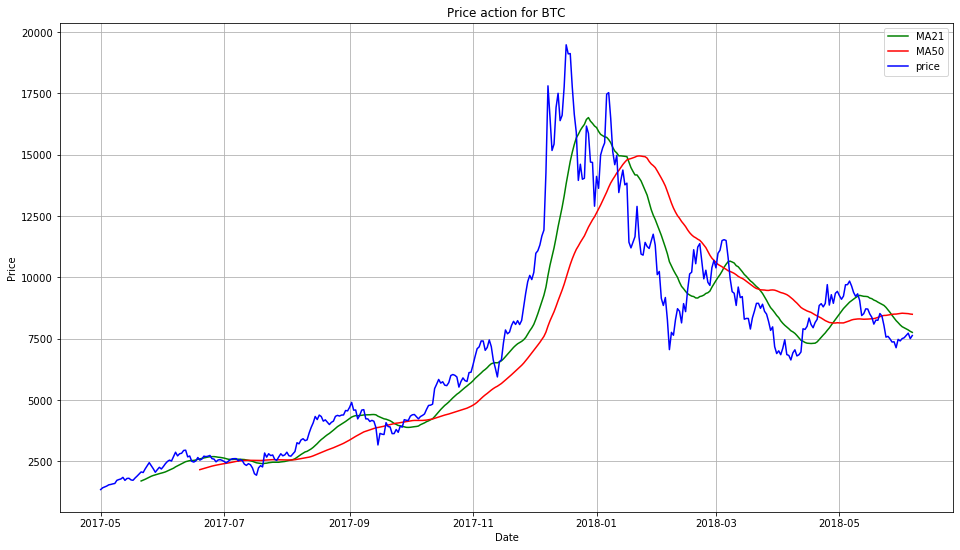

In [11]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия. Мы напишем функцию которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

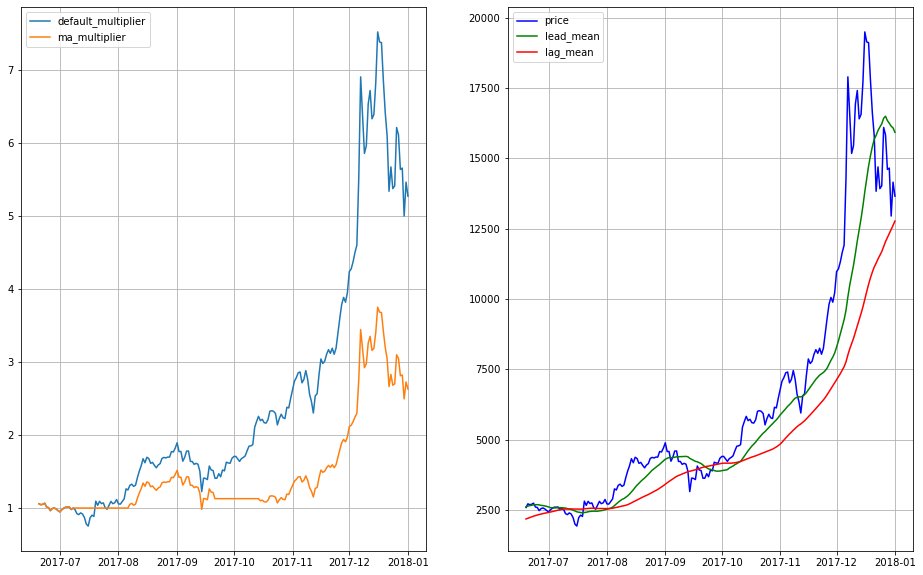

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

In [12]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    strategy = pd.DataFrame({'price': coins.loc[coins['symbol'] == symbol, 'close'][start_date:end_date]})
    strategy['lead_mean'] = strategy['price'].rolling(window=lead_window).mean()
    strategy['lag_mean'] = strategy['price'].rolling(window=lag_window).mean()
    strategy.dropna(inplace=True)
    strategy['ma_difference'] = (strategy['lead_mean'] - strategy['lag_mean']) / strategy['price']
    strategy['action'] = np.where(strategy['ma_difference'] > threshold, 1, 0)
    strategy['log_returns'] = np.log(strategy['price'] / strategy['price'].shift(1))
    strategy['default_multiplier'] = strategy['log_returns'].cumsum().apply(np.exp)

    strategy['ma_multiplier'] = (strategy['action'].shift(1) * strategy['log_returns']).cumsum().apply(np.exp)

    fig = plt.figure(figsize=(16, 10))
    ax1 = fig.add_subplot(121)
    ax1.plot(strategy['default_multiplier'], label='default_multiplier')
    ax1.plot(strategy['ma_multiplier'], label='ma_multiplier')
    ax1.grid(True)
    ax1.legend(loc='best')

    ax2 = fig.add_subplot(122)

    ax2.plot(strategy['price'], color='blue', label='price')
    ax2.plot(strategy['lead_mean'], color='green', label='lead_mean')
    ax2.plot(strategy['lag_mean'], color='red', label='lag_mean')
    ax2.grid(True)
    ax2.legend(loc='best')

    plt.show()

symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Поигравшись с графиками можно понять что для разных монет и периодов времени хорошие результаты достигаются при разных значениях параметров. В идеале хотелось бы подобрать параметры которые работали для всех монет и периодов времени. Для такой простой модели это невозможно - в ней слишком мало параметров чтобы выразить все разнообразие ситуаций. Тут можно начать говорить про bias-variance tradeoff, но это уже машинное обучение, а не аналитика.

## 4. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

![Disclamer](https://i.kym-cdn.com/entries/icons/original/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.png)

# NB


## Другие инструменты работы с данными

Если ваш датасет не слишком большой, то pandas это де-факто лучший инструмент в наличии. В противном случае есть альтернативы:
 - [numpy](http://www.numpy.org/) - библиотека для низкоуровневой работы с многомерными массивами из примитивных типов данных. Подходит для "векторизованной" обработки. Numpy - ваш последний шанс все еще писать на обычном питоне, без биндингов на С. Подходит для задач быстрой обработки не слишком больших данных. На самом деле внутри, pandas использует numpy.
 - [Graphlab](https://turi.com/) - Платная питоновская библиотека для работы как с большими данными так и с маленькими датасетами. Данные представляются как SFrame объекты, во многом похожие на DataFrame из pandas.
 - [Hadoop](https://hadoop.apache.org/) - стек технологии для работы с очень большими данными, в частности есть классический MapReduce.
 
## Другие инструменты визуализации


Для визуализации библиотек намного больше. Вот самые популярные
 - [Pandas](https://pandas.pydata.org/) - для быстрой и очень простой визуализации. Любая мелкая настройка потребует знания matplotlib
 - [Seaborn](https://seaborn.pydata.org/) - широкий но фиксированный набор сложных визуализаций с красивыми цветовыми схемами. Библиотека является надстройкой над matplotlib, и, опять же, тонкие настройки потребуют знания matplotlib.
   - [Галерея с примерами](https://seaborn.pydata.org/examples/index.html)
   - [Руководство](https://seaborn.pydata.org/tutorial.html)
 - [ggplot](http://ggplot.yhathq.com/) - многообещающая библиотека скопированная из R. Пока на этапе развития
 - [Bokeh](https://bokeh.pydata.org/en/latest/) - библиотека для визуализации в web.
 - [Plot.ly](https://plot.ly/) - библиотека для интерактивных и статических визуализаций. Нацелена на работу в облаке, но можно работать и локально.
   - [Галерея с примерами](https://plot.ly/python/)
   - [Краткое ввдение](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf)